In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import sklearn
from sklearn import svm
np.random.seed(2)
from sklearn.svm import SVC
from sklearn import svm, datasets
import seaborn as sns; sns.set()

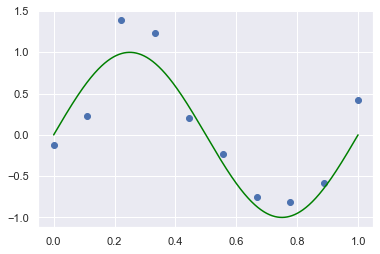

In [32]:
x = np.linspace(0,1,10)
y = np.sin((2*math.pi)*x) + np.random.normal(0,0.3,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'o')
x_1=np.linspace(0,1,1000)
plt.plot(x_1,np.sin((2*math.pi)*x_1),color='green')

In [33]:
def phi(x, order):
    x = np.atleast_1d(x)
    M = order
    N = len(x)
    return np.column_stack([x**k for k in range(order+1)])

In [34]:
X=np.array(phi(x,9))
X_1=np.array(phi(x_1,9))

In [35]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [36]:
X.shape

(10, 10)

In [37]:
X_1.shape

(1000, 10)

In [38]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

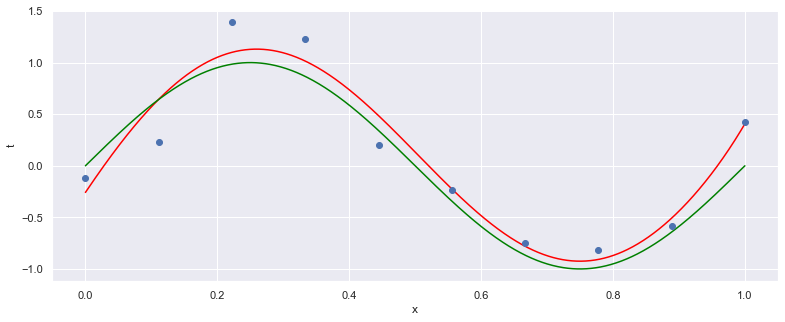

In [39]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
rcParams['figure.figsize'] = 15, 9
ridgeReg=Ridge(alpha=0.000009,normalize=True) # alpha = 1/2 * lambda
ridgeReg.fit(X,y)
plt.figure(figsize=(13, 5))
plt.plot(x_1,ridgeReg.predict(X_1), color='red')
plt.ylabel('t')
plt.xlabel('x')
plt.plot(x_1,np.sin((2*math.pi)*x_1),color='green')
plt.plot(data['x'], data['y'], 'o',)

## single variable -> binary target SVM

In [40]:
# we create 40 linearly separable points
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

In [41]:
clf = svm.SVC(kernel= "linear", C=1)
clf.fit(X, Y)

SVC(C=1, kernel='linear')

In [42]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

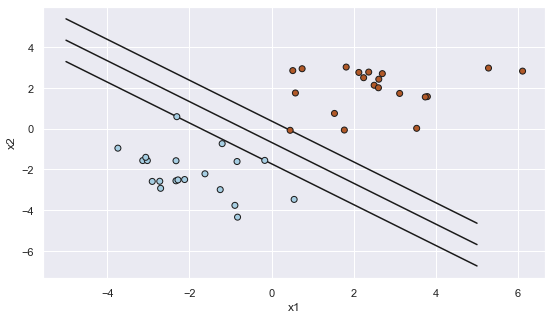

In [45]:
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(9, 5))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="face")
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Multiple variable --> multinomial target SVM

X0, X1 --> Y

In [60]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
feature_names = iris.feature_names[:2]
classes = iris.target_names

In [61]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1 # X0와 X1 feature의 최대 최소 확장
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # X0와 X! 최대 최소가 다르니까 meshgrid로 matrix size 맞춤
    return xx, yy # : X0는 column으로 나열하고 row 다 동일, X1은 row로 나열하고 column 다 동일

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # X, Y 다 값 나눴잖아 그거 순서쌍 별로 전부 다 실행해서 예측
    Z = Z.reshape(xx.shape) # X0의 shape이 100 * 200이면 Z가 200000개 생기잖아 그거를 다시 100 * 200으로 맞추는 거야.
    out = ax.contourf(xx, yy, Z, **params) # 가로 축 X0, 세로 축 X1, 색 Z
    return out

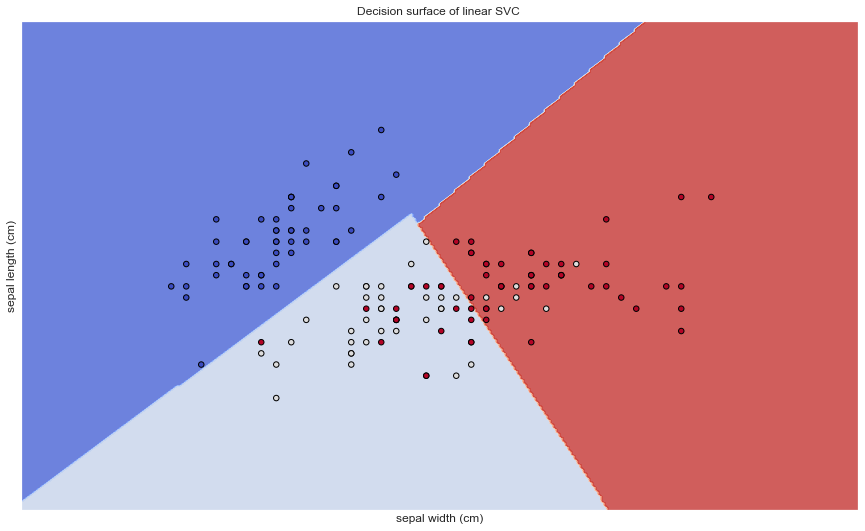

In [62]:
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) # cmap: Spectral
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors="black") # s는 market size, edgecolors는 모서리 색상
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

X2, X3 --> y

In [50]:
X = iris.data[:, 2:]
y = iris.target
feature_names = iris.feature_names[2:]
classes = iris.target_names

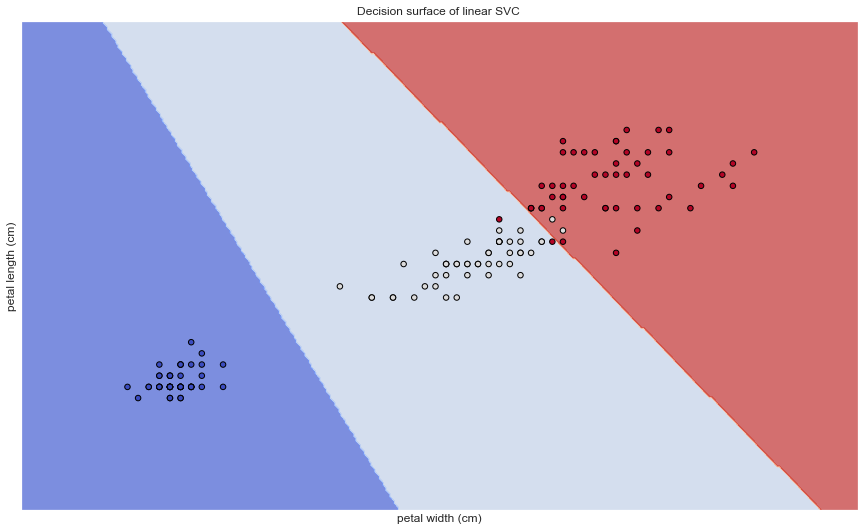

In [58]:
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X2, X3 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X2, X3)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
ax.scatter(X2, X3, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()